##第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．


In [ ]:
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3

!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -a

In [ ]:
!curl 'https://nlp100.github.io/data/neko.txt' >neko.txt
!mecab < neko.txt > neko.txt.mecab
!head -n20 neko.txt.mecab >neko.test
!head -n20 neko.test

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  952k  100  952k    0     0   395k      0  0:00:02  0:00:02 --:--:--  395k
一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*



30. 形態素解析結果の読み込みPermalink
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [ ]:
neko_file='neko.txt.mecab'
#neko_file='neko.test'
def neko_read(file):
  with open(file, mode='r', encoding='utf-8') as f:
    neko_list=[]
    neko_list1=[]
    #1行ずつ読み込み
    for line in f.readlines():
      #タブで区切る
      split1=line.split('\t')
      surface=split1[0]
      #EOSなら行を区切る
      if surface=='EOS\n':
        neko_list.append(neko_list1)
        neko_list1=[]
      #品詞が無いものは省略
      elif len(split1)<=1:
        pass
      #品詞があるものは格納
      else:
        split2=split1[1].split(',')
        base=split2[6]
        pos=split2[0]
        pos1=split2[1]
        neko_list1.append({'surface':surface,'base':base,'pos':pos,'pos1':pos1})
    return neko_list
print(neko_read(neko_file)[30])

[{'surface': 'その', 'base': 'その', 'pos': '連体詞', 'pos1': '*'}, {'surface': '上今', 'base': '上今', 'pos': '名詞', 'pos1': '固有名詞'}, {'surface': 'まで', 'base': 'まで', 'pos': '助詞', 'pos1': '副助詞'}, {'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '連体化'}, {'surface': '所', 'base': '所', 'pos': '名詞', 'pos1': '非自立'}, {'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '違っ', 'base': '違う', 'pos': '動詞', 'pos1': '自立'}, {'surface': 'て', 'base': 'て', 'pos': '助詞', 'pos1': '接続助詞'}, {'surface': '無', 'base': '無', 'pos': '接頭詞', 'pos1': '名詞接続'}, {'surface': '暗に', 'base': '暗に', 'pos': '副詞', 'pos1': '一般'}, {'surface': '明るい', 'base': '明るい', 'pos': '形容詞', 'pos1': '自立'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}, {'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'}]


31. 動詞Permalink
動詞の表層形をすべて抽出せよ．

In [ ]:
neko_file='neko.txt.mecab'
neko_sp=neko_read(neko_file)

#動詞を抽出
doushi=[]
for nekod in neko_sp:
  for n in nekod:
    if n['pos']=='動詞':
      doushi.append(n['surface'])
    else:
      pass

#重複削除
doushi=list(set(doushi))
print(doushi[:10])

['いえ', '荒立て', '限っ', '押し', 'みよ', '帰る', 'とく', 'こすっ', '心得る', '誓っ']


32. 動詞の原形Permalink
動詞の原形をすべて抽出せよ．

In [ ]:
neko_file='neko.txt.mecab'
neko_sp=neko_read(neko_file)

#動詞の原形を抽出
doushi_o=[]
for nekod in neko_sp:
  for n in nekod:
    if n['pos']=='動詞':
      doushi_o.append(n['base'])
    else:
      pass
      
#重複削除
doushi_o=list(set(doushi_o))
print(doushi_o[:10])

['帰る', 'とく', '心得る', 'いざる', 'つつむ', '凝り固まる', '遣る', '折る', '塗る', '裏返す']


33. 「AのB」Permalink
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [ ]:
neko_file='neko.txt.mecab'
#neko_file='neko.test'
neko_sp=neko_read(neko_file)

meishi_no=[]
for nekod in neko_sp:
  for i in range(len(nekod)):
    #2つ先まで探しに行って対象を格納
    if i<len(nekod)-2:
      if nekod[i]['pos']=='名詞' and nekod[i+1]['surface']=='の' and nekod[i+2]['pos']=='名詞':
        meishi_no.append(nekod[i]['surface']+'の'+nekod[i+2]['surface'])
      else:
        pass
    else:
      pass

#重複削除
meishi_no=list(set(meishi_no))
print(meishi_no[:10])

['主人の声', '己の御蔭', '鼻の持主', '上の作用', '禅の機鋒', '垣根のそ', '新年の御慶', '洗い晒しの不断', '世界の表面', '月の光']


34. 名詞の連接Permalink
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [ ]:
neko_file='neko.txt.mecab'
#neko_file='neko.test'
neko_sp=neko_read(neko_file)

meishi_con=[]
for nekod in neko_sp:
  mcon=''
  i=0
  #名詞が続く限り格納
  for n in nekod:
    if n['pos']=='名詞':
      mcon+=n['surface']
      i+=1
      #print(i,mcon)
    else:
      if i>=2:
        meishi_con.append(mcon)
      else:
        pass
      mcon=''
      i=0

#重複削除
meishi_con=list(set(meishi_con))
print(meishi_con[:10])

['張飛', 'それ限り', '保証人', '自信家', '賛成員', '空霊', '粋無粋', '寒月君それ', '布衍', '田舎もの']


35. 単語の出現頻度Permalink
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [ ]:
neko_file='neko.txt.mecab'
#neko_file='neko.test'
neko_sp=neko_read(neko_file)

n_dict={}
for nekod in neko_sp:
  for n in nekod:
    surface=n['surface']
    #単語が既存辞書になければ追加、あればvalueを+1
    if n_dict.get(surface)==None:
      d={surface:1}
      n_dict.update(d)
    else:
      d={surface:n_dict[surface]+1}
      n_dict.update(d)

#ソート
n_list = sorted(n_dict.items(), key=lambda x:x[1], reverse=True)
print(n_list[:10])

[('', 9964), ('の', 9194), ('。', 7486), ('て', 6868), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337)]


In [ ]:
#defaultdict
from collections import defaultdict
n_dict = defaultdict(int)

for nekod in neko_sp:
  for n in nekod:
    surface=n['surface']
    n_dict[surface]+=1

#ソート
n_list = sorted(n_dict.items(), key=lambda x:x[1], reverse=True)
print(n_list[:10])

[('', 9964), ('の', 9194), ('。', 7486), ('て', 6868), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337)]


36. 頻度上位10語Permalink
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [ ]:
pip install japanize_matplotlib

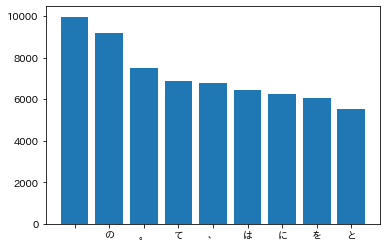

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

def n_graph(result):
  #単語と出現数を取得
  x_list=[]
  y_list=[]
  for i in range(9):
    x_list.append(result[i][0])
    y_list.append(result[i][1])
  #描画
  x = x_list
  y = y_list
  plt.bar(x, y)
  plt.show()

n_graph(n_list)

37. 「猫」と共起頻度の高い上位10語Permalink
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

[('', 10627), ('の', 10367), ('。', 8113), ('て', 7555), ('、', 7528), ('は', 7236), ('に', 6993), ('を', 6767), ('と', 6114), ('が', 5877)]


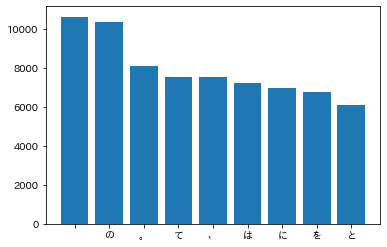

In [ ]:
from collections import defaultdict
n_dict2 = defaultdict(int)

for nekod in neko_sp:
  list1=[]
  #猫があるかを1行ずつ確認
  for n in nekod:
    surface=n['surface']
    list1.append(surface)
  #猫があれば格納
  if '猫' in list1:
    for n in nekod:
      surface=n['surface']
      n_dict[surface]+=1
  else:
    pass

#ソート
n_list2 = sorted(n_dict.items(), key=lambda x:x[1], reverse=True)print(n_list2[:10])

n_graph(n_list2)

【ご質問】上のようにリスト内の要素がタプルとなっている場合に、要素の抽出方法として適した手法があればご教示いただけますでしょうか。

38. ヒストグラムPermalink
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

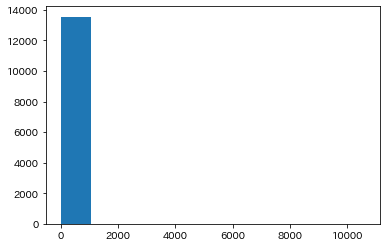

In [ ]:
#出現数を取得
x_list=n_dict.values()
#描画
x = x_list
plt.hist(x)
plt.show()

39. Zipfの法則Permalink
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

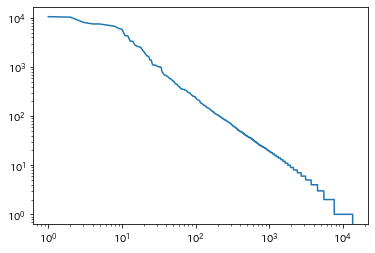

In [ ]:
import numpy as np
#順位に対応するリストを作成
#出現数0が入ってしまっている？
x_list=np.array(range(1,len(n_list)+2))
#出現数を取得
y_list=list(n_dict.values())
y_list.sort(reverse=True)
#描画
x = x_list
y = y_list
plt.plot(x, y)
plt.xscale('log')
plt.yscale('log')
plt.show()